In [1]:
import tensorflow as tf

In [2]:
from random import shuffle
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
import random, os

In [3]:
path = "/home/ichanho/workspace/Dice/dice/"

In [4]:
train_path = path + "train/"
train_d4_path = path + "train/d4/"
train_d6_path = path + "train/d6/"
train_d8_path = path + "train/d8/"
train_d10_path = path + "train/d10/"
train_d12_path = path + "train/d12/"
train_d20_path = path + "train/d20/"

print(train_d4_path)
print(train_d6_path)
print(train_d8_path)
print(train_d10_path)
print(train_d12_path)
print(train_d20_path)

/home/ichanho/workspace/Dice/dice/train/d4/
/home/ichanho/workspace/Dice/dice/train/d6/
/home/ichanho/workspace/Dice/dice/train/d8/
/home/ichanho/workspace/Dice/dice/train/d10/
/home/ichanho/workspace/Dice/dice/train/d12/
/home/ichanho/workspace/Dice/dice/train/d20/


In [5]:
train_d4_fnames = os.listdir(train_d4_path)
train_d6_fnames = os.listdir(train_d6_path)
train_d8_fnames = os.listdir(train_d8_path)
train_d10_fnames = os.listdir(train_d10_path)
train_d12_fnames = os.listdir(train_d12_path)
train_d20_fnames = os.listdir(train_d20_path)

print(train_d4_fnames[:5])

['d4_angle_color232.jpg', 'd4_wood0878.jpg', 'd4_color294.jpg', 'd4352.jpg', 'd4_wood0864.jpg']


In [6]:
print("Total train image( d4) : ", len(train_d4_fnames))
print("Total train image( d6) : ", len(train_d6_fnames))
print("Total train image( d8) : ", len(train_d8_fnames))
print("Total train image(d10) : ", len(train_d10_fnames))
print("Total train image(d12) : ", len(train_d12_fnames))
print("Total train image(d20) : ", len(train_d20_fnames))

Total train image( d4) :  1948
Total train image( d6) :  4046
Total train image( d8) :  1532
Total train image(d10) :  1722
Total train image(d12) :  1692
Total train image(d20) :  3347


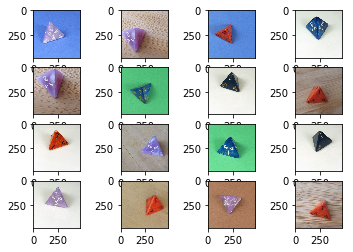

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows, ncols = 4, 4
index = 0


for i in range(16):
    sp = plt.subplot(nrows, ncols, i + 1)
    img = mpimg.imread(train_d4_path + train_d4_fnames[i])
    # print(img, type(img))
    plt.imshow(img)
plt.show()

In [8]:
categories = []
filenames = []

In [9]:
IMAGE_WIDTH = 300
IMAGE_HEIGHT = 300
CHANNEL = 3

In [10]:
for filename in os.listdir(train_d4_path):
    if(filename[0] == 'd'):
        categories.append(0)
        img = Image.open(train_d4_path + filename)
        img = img.convert("RGB")
        img = img.resize((IMAGE_WIDTH, IMAGE_HEIGHT))
        data = np.asarray(img)
        filenames.append(data)

for filename in os.listdir(train_d6_path):
    if(filename[0] == 'd'):
        categories.append(1)
        img = Image.open(train_d6_path + filename)
        img = img.convert("RGB")
        img = img.resize((IMAGE_WIDTH, IMAGE_HEIGHT))
        data = np.asarray(img)
        filenames.append(data)
        
for filename in os.listdir(train_d8_path):
    if(filename[0] == 'd'):
        categories.append(2)
        img = Image.open(train_d8_path + filename)
        img = img.convert("RGB")
        img = img.resize((IMAGE_WIDTH, IMAGE_HEIGHT))
        data = np.asarray(img)
        filenames.append(data)
        
for filename in os.listdir(train_d10_path):
    if(filename[0] == 'd'):
        categories.append(3)
        img = Image.open(train_d10_path + filename)
        img = img.convert("RGB")
        img = img.resize((IMAGE_WIDTH, IMAGE_HEIGHT))
        data = np.asarray(img)
        filenames.append(data)
        
# for filename in os.listdir(train_d12_path):
#     if(filename[0] == 'd'):
#         categories.append(4)
#         img = Image.open(train_d12_path + filename)
#         img = img.convert("RGB")
#         img = img.resize((IMAGE_WIDTH, IMAGE_HEIGHT))
#         data = np.asarray(img).astype(np.int)
#         filenames.append(img)
        
for filename in os.listdir(train_d20_path):
    if(filename[0] == 'd'):
        categories.append(5)
        img = Image.open(train_d20_path + filename)
        img = img.convert("RGB")
        img = img.resize((IMAGE_WIDTH, IMAGE_HEIGHT))
        data = np.asarray(img)
        filenames.append(data)

    

In [11]:
np.array(filenames).shape

(12593, 300, 300, 3)

In [12]:
np.array(categories).shape

(12593,)

In [13]:
train_x, valid_x, train_y, valid_y = train_test_split(filenames, categories, test_size=0.2, shuffle=True, random_state=54)

In [14]:
train_X = np.array(train_x)
train_Y = np.array(train_y)

train_X.shape

(10074, 300, 300, 3)

In [15]:
y = np.array(train_y)

In [16]:
import pandas as pd
y= pd.get_dummies(y)

In [17]:
y.shape

(10074, 5)

In [18]:
model = tf.keras.Sequential()

In [19]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, CHANNEL)))
# model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3)))
# model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3)))
# model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=16, activation='relu'))
# model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(units=5, activation='softmax'))

In [20]:
model.compile('adam','categorical_crossentropy','accuracy')

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 313600)            0

In [ ]:
history = model.fit(train_X, y,epochs=25,validation_data=(valid_x,valid_y))

Epoch 1/25
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: attrib() got an unexpected keyword argument 'convert'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: attrib() got an unexpected keyword argument 'convert'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
315/315 [==============================] - ETA: 0s - loss: 70.6352 - accuracy: 0.3094

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-22-6d577db5358a>", line 1, in <module>
    history = model.fit(train_X, y,epochs=25,validation_data=(valid_x,valid_y))
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py", line 1213, in fit
    steps_per_execution=self._steps_per_execution)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/data_adapter.py", line 1364, in get_data_handler
    return DataHandler(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/data_adapter.py", line 1152, in __init__
    adapter_cls = select_data_adapter(x, y)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/data_adapter.py", line 994, in select_data_adapter
    _type_name(x), _type_name(y)))
ValueErro

In [ ]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.2)

ERROR! Session/line number was not unique in database. History logging moved to new session 106


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Epoch 1/25


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-22-381f82725fae>", line 1, in <module>
    history = model.fit(train_X, train_Y, epochs=25, validation_split=0.2)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py", line 1183, in fit
    tmp_logs = self.train_function(iterator)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/eager/def_function.py", line 889, in __call__
    result = self._call(*args, **kwds)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/eager/def_function.py", line 917, in _call
    return self._stateless_fn(*args, **kwds)  # pylint: disable=not-callable
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/eager/function.py", line 3022, in __call__
    filtered_flat_args) = self._maybe_define_function(args, kwargs)
  F

In [53]:
train_X.shape

(12984,)